In [1]:
#!pip install shap
#!pip install sklearn
import pandas as pd
import numpy as np
import shap
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
df = pd.read_csv("use_data/merged_dataset.csv")
df

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,149002,282,885,3791,1500.0,1111,0,5.0,2.0
1,149002,282,885,3791,1500.0,1107,0,5.0,2.0
2,109881,230,629,1,1662.0,820,0,4.0,0.0
3,109881,230,629,1,1662.0,820,0,4.0,0.0
4,109881,230,629,1,1662.0,820,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
6544,73105,259,614,637,2603.0,1111,0,2.0,0.0
6545,403421,175,1181,4760,247.0,1111,0,3.0,1.0
6546,116738,186,267,1200,2276.0,1110,0,2.0,1.0
6547,116738,186,267,1200,2276.0,1101,0,2.0,1.0


In [3]:
df = df.drop('brand_id', axis=1)
df = df.drop('age_range', axis=1)
df = df.drop('gender', axis=1)
#Split between IDs and Data
df_ids = df.iloc[:, :4]
df_vals = df.iloc[:, 4:]
df_vals

,time_stamp,action_type
0,1111,0
1,1107,0
2,820,0
3,820,0
4,820,0
...,...,...
6544,1111,0
6545,1111,0
6546,1110,0
6547,1101,0


<AxesSubplot:xlabel='time_stamp', ylabel='action_type'>

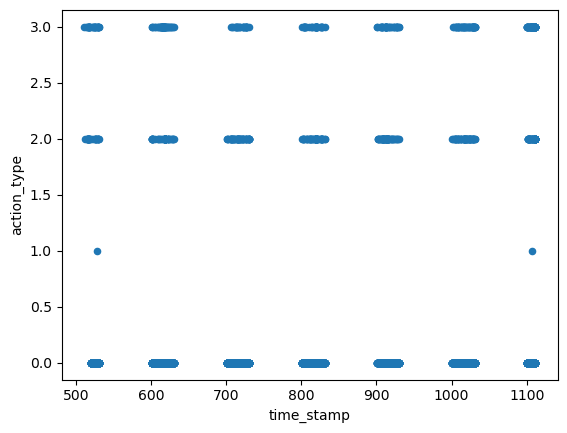

In [4]:
df_vals.plot(kind = 'scatter', x = 'time_stamp', y = 'action_type')

<AxesSubplot:ylabel='Frequency'>

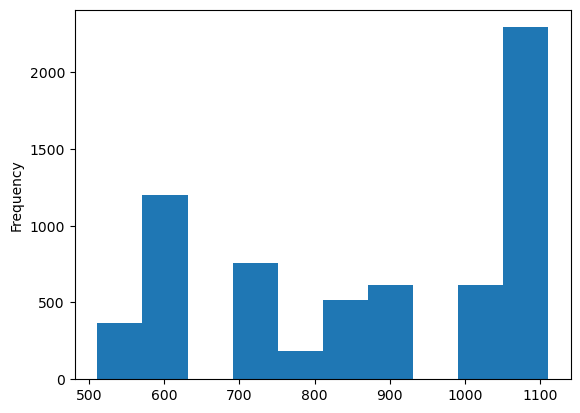

In [5]:
df_vals['time_stamp'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

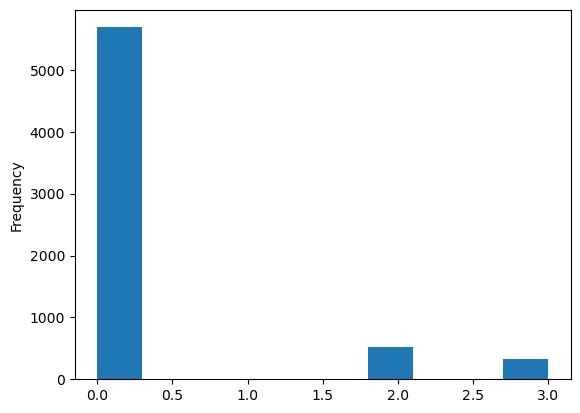

In [6]:
df_vals['action_type'].plot(kind="hist")